# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="inner")

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [31]:
# Checking the number of mice.
number_of_mice = combined_data["Mouse ID"].nunique()
number_of_mice


249

In [32]:
# Our data should be uniquely identified by Mouse ID and Timepoint
mouse_timepoint = combined_data[["Mouse ID", "Timepoint"]].nunique()
mouse_timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicated_mice = combined_data[combined_data.duplicated(["Mouse ID", "Timepoint"])]
duplicated_mice


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [33]:
# Optional: Get all the data for the duplicate mouse ID.
duplicated_mice_data = combined_data[combined_data["Mouse ID"] == "g989"]
duplicated_mice_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [34]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data.drop_duplicates("Mouse ID")
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [48]:
# Checking the number of mice in the clean DataFrame.
clean_data["Mouse ID"].nunique()

249

## Summary Statistics

In [36]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
mean = combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median = combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance = combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
stdv = combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem = combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

summary_df = pd.DataFrame({"Mean Tumor Volume": mean,
"Median Tumor Volume": median,
"Tumor Volume Variance": variance,
"Tumor Volume Std. Dev.": stdv,
"Tumor Volume Std. Err.": sem})




# Assemble the resulting series into a single summary DataFrame.
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [37]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
summary_df = combined_data.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
summary_df
# Using the aggregation method, produce the same summary statistics in a single line
agg_df = combined_data.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
agg_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

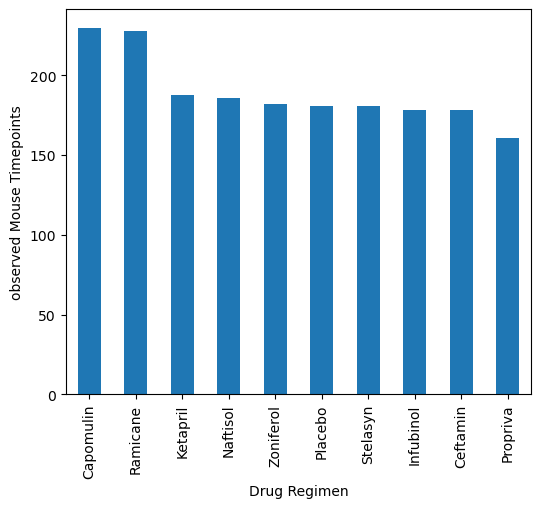

In [38]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
plot_data = combined_data.groupby("Drug Regimen")["Mouse ID"].count()       

drug_regimen_counts = combined_data['Drug Regimen'].value_counts()

# Create a bar plot
drug_regimen_counts.plot(kind='bar', figsize=(6, 5))

# Add title and labels

plt.xlabel('Drug Regimen')
plt.ylabel('observed Mouse Timepoints')

# Show plot
plt.show()


Text(0, 0.5, 'observed Mouse Timepoints')

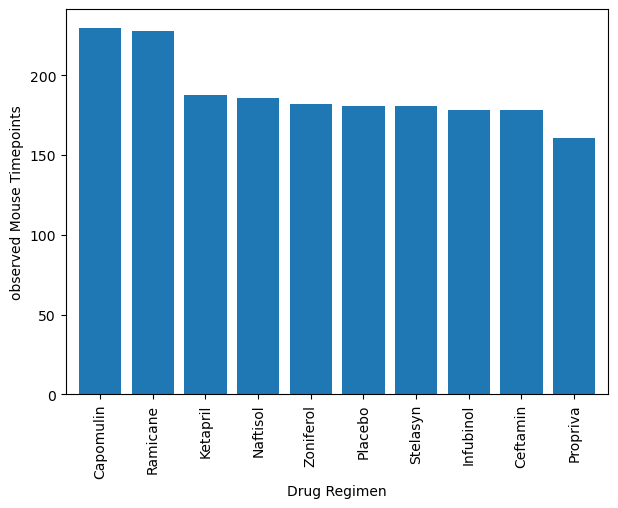

In [39]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_regimen_counts.plot(kind='bar', figsize=(7,5), width=0.8)
plt.xlabel('Drug Regimen')
plt.ylabel('observed Mouse Timepoints')


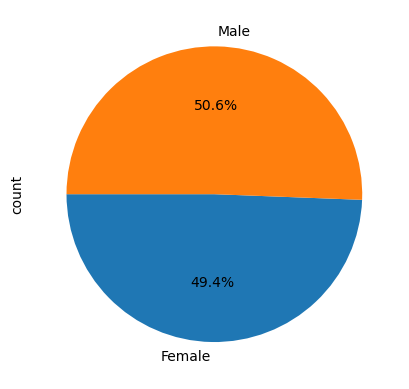

In [40]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
plot_data = combined_data.groupby("Sex")["Mouse ID"].count()
plot_data.plot(kind='pie', autopct='%1.1f%%', startangle=180)
plt.ylabel('count')  # Optional: Hide the ylabel for a cleaner look
plt.show()



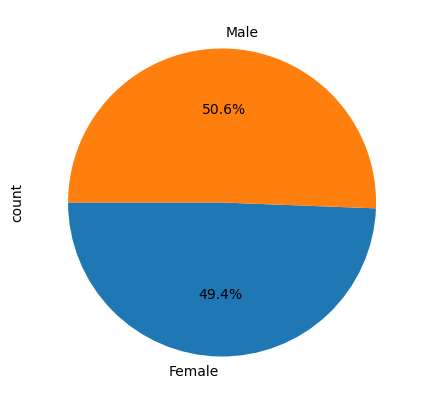

In [41]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
plot_data = combined_data.groupby("Sex")["Mouse ID"].count()

# Define labels and colors
labels = plot_data.index
sizes = plot_data.values
colors = ['lightblue', 'lightcoral']

# Create the pie chart
plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=180)

plt.ylabel('count')  # Hide the y-label
plt.show()

## Quartiles, Outliers and Boxplots

In [42]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
final_tumor_volume = combined_data.groupby('Mouse ID').max()['Timepoint']
final_tumor_volume
# Capomulin, Ramicane, Infubinol, and Ceftamin
capomulin_df = combined_data.loc[combined_data["Drug Regimen"] == "Capomulin",:]
ramicane_df = combined_data.loc[combined_data["Drug Regimen"] == "Ramicane", :]
infubinol_df = combined_data.loc[combined_data["Drug Regimen"] == "Infubinol", :]
ceftamin_df = combined_data.loc[combined_data["Drug Regimen"] == "Ceftamin", :]

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = combined_data.groupby('Mouse ID').max()['Timepoint']
greatest_timepoint_df = greatest_timepoint.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
mereged_data = pd.merge(combined_data, greatest_timepoint_df, on=["Mouse ID", "Timepoint"])
                      
mereged_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28,5,45.934712,0
245,z435,Propriva,Female,12,26,10,48.710661,0
246,z581,Infubinol,Female,24,25,45,62.754451,3
247,z795,Naftisol,Female,13,29,45,65.741070,3


In [43]:
# Put treatments into a list for for loop (and later for plot labels)
filtered_data = mereged_data[mereged_data['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]



def calculate_iqr(data):
    quartiles = data.quantile([0.25, 0.5, 0.75])
    q1 = quartiles[0.25]
    q3 = quartiles[0.75]
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return q1, q3, iqr, lower_bound, upper_bound
# Initialize a dictionary to store the results
iqr_summary = {}

#Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']:
    drug_data = filtered_data[filtered_data['Drug Regimen'] == drug]['Tumor Volume (mm3)']
    q1, q3, iqr, lower_bound, upper_bound = calculate_iqr(drug_data)
    
    outliers = drug_data[(drug_data < lower_bound) | (drug_data > upper_bound)]
    
    iqr_summary[drug] = {
        'Q1': q1,
        'Q3': q3,
        'IQR': iqr,
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Outliers': outliers
    }
    # Locate the rows which contain mice on each drug and get the tumor volumes


    # add subset


    # Determine outliers using upper and lower bounds
for drug, summary in iqr_summary.items():
    print(f"Drug Regimen: {drug}")
    print(f"  Q1: {summary['Q1']}")
    print(f"  Q3: {summary['Q3']}")
    print(f"  IQR: {summary['IQR']}")
    print(f"  Lower Bound: {summary['Lower Bound']}")
    print(f"  Upper Bound: {summary['Upper Bound']}")
    print(f"  Outliers: {summary['Outliers'].values}")
    print()


Drug Regimen: Capomulin
  Q1: 32.37735684
  Q3: 40.1592203
  IQR: 7.781863460000004
  Lower Bound: 20.70456164999999
  Upper Bound: 51.83201549
  Outliers: []

Drug Regimen: Ramicane
  Q1: 31.56046955
  Q3: 40.65900627
  IQR: 9.098536719999998
  Lower Bound: 17.912664470000003
  Upper Bound: 54.30681135
  Outliers: []

Drug Regimen: Infubinol
  Q1: 54.04860769
  Q3: 65.52574285
  IQR: 11.477135160000003
  Lower Bound: 36.83290494999999
  Upper Bound: 82.74144559000001
  Outliers: [36.3213458]

Drug Regimen: Ceftamin
  Q1: 48.72207785
  Q3: 64.29983003
  IQR: 15.577752179999997
  Lower Bound: 25.355449580000002
  Upper Bound: 87.66645829999999
  Outliers: []



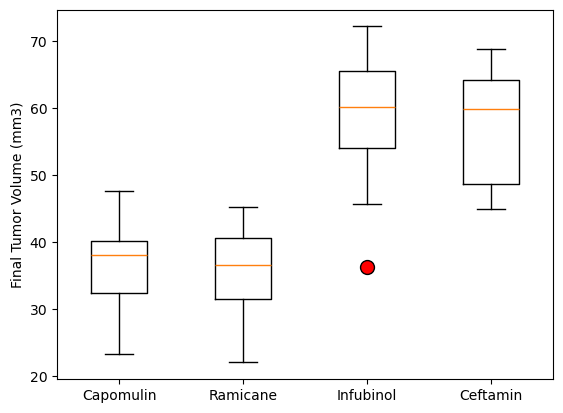

In [44]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
capomulin_data = filtered_data[filtered_data['Drug Regimen'] == 'Capomulin']['Tumor Volume (mm3)']
ramicane_data = filtered_data[filtered_data['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)']
infubinol_data = filtered_data[filtered_data['Drug Regimen'] == 'Infubinol']['Tumor Volume (mm3)']
ceftamin_data = filtered_data[filtered_data['Drug Regimen'] == 'Ceftamin']['Tumor Volume (mm3)']

# Combine the data into a list for plotting
data = [capomulin_data, ramicane_data, infubinol_data, ceftamin_data]
labels = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Define flier properties to use red circles for outliers
flierprops = dict(marker='o', markerfacecolor='red', markersize=10, linestyle='none')

# Create the box plot
fig1, ax1 = plt.subplots()

# Add title and labels
ax1.set_ylabel('Final Tumor Volume (mm3)')

# Apply flierprops to the box plot
ax1.boxplot(data, labels=labels, flierprops=flierprops)

# Show the plot
plt.show()

## Line and Scatter Plots

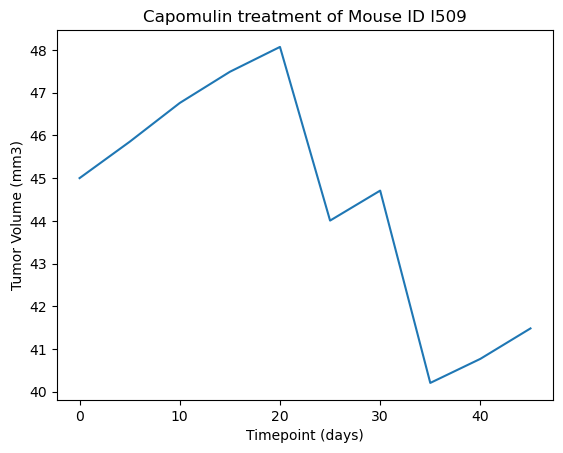

In [45]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

mouse_id = 'l509'

mouse_data = combined_data[combined_data['Mouse ID'] == mouse_id]

plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'])

plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Capomulin treatment of Mouse ID {mouse_id}')

plt.show()


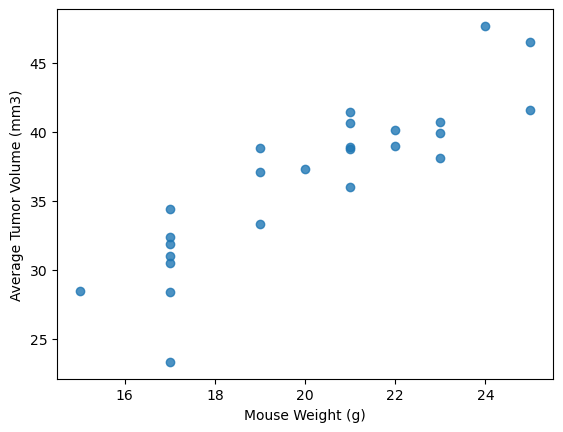

In [46]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_df = filtered_data[filtered_data['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Get the corresponding mouse weights
mouse_weights = capomulin_df.groupby('Mouse ID')['Weight (g)'].mean()

# Create the scatter plot
fig, ax = plt.subplots()
ax.scatter(mouse_weights, average_tumor_volume, alpha=0.8)

# Add title and labels
ax.set_xlabel('Mouse Weight (g)')
ax.set_ylabel('Average Tumor Volume (mm3)')

# Show the plot
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.88.


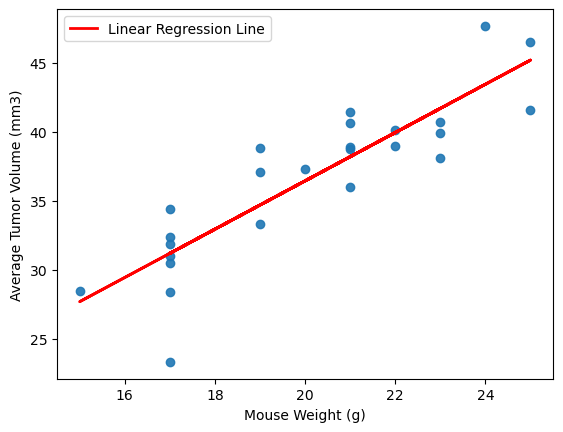

In [47]:
# Calculate the correlation coefficient and a linear regression model# Calculate the correlation coefficient and a linear regression model
average_tumor_volume = capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weights = capomulin_df.groupby('Mouse ID')['Weight (g)'].mean()


correlation = st.pearsonr(average_tumor_volume, mouse_weights)[0]
print(f"The correlation between mouse weight and the average tumor volume is {correlation:.2f}.")

slope, intercept, r_value, p_value, std_err = st.linregress(mouse_weights, average_tumor_volume)

# Create the scatter plot
fig, ax = plt.subplots()

ax.scatter(mouse_weights, average_tumor_volume, alpha=0.9)

# Plot the linear regression line
regression_line = slope * mouse_weights + intercept
ax.plot(mouse_weights, regression_line, color='red', linewidth=2, label='Linear Regression Line')

ax.set_xlabel('Mouse Weight (g)')
ax.set_ylabel('Average Tumor Volume (mm3)')
ax.legend()
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
